<a href="https://colab.research.google.com/github/jeekyung/ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EC%99%84%EB%B2%BD%EA%B0%80%EC%9D%B4%EB%93%9C_ch2_1~5_pg_87~131_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[CHAPTER 02] 사이킷런으로 시작하는 머신러닝**
---

## **01 사이킷런 소개와 특징**

---

파이썬 머신러닝 라이브러리 중 가장 많이 사용되는 라이브러리

<u>scikit-learning 특징</u>

-가장 파이썬스럽고 쉬운 API 제공

-머신러닝을 위한 매우 다양한 알고리즘과 개발을 위한 편리한 프레임워크와 API 제공

In [4]:
import sklearn

print(sklearn.__version__)

1.0.2


## **02 첫번째 머신러닝 만들어보기 - 붓꽃 품종 예측하기**

---

붓꽃 데이터 세트로 붓꽃의 품종 분류하기(Classification)

붓꽃 데이터 세트 : 꽃잎의 길이와 너비, 꽃받침의 길이와 너비 feature를 기반으로 꽃의 품종을 예측하기 위한 것

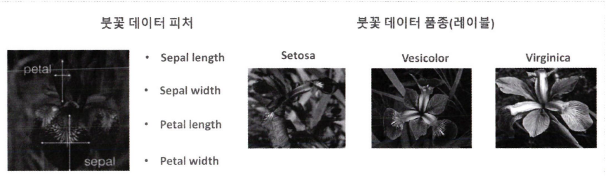

분류(Classification)는 대표적인 지도학습(supervised learning) 방법의 하나

지도학습(supervised learning)은 다양한 feature와 분류 결정값인 레이블(label) 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블 예측

=명확한 정답이 주어진 데이터를 먼저 학습한 뒤 미지의 정답 예측

학습 데이터 세트: 학습을 위해 주어진 데이터 세트

테스트 데이터 세트: 머신러닝 모델의 예측 성능을 평가하기 위해 별도로 주어진 데이터 세트

sklearn.datasets 내의 모듈: 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임

sklearn.tree 내의 모듈: 트리 기반 ML알고리즘을 구현할 클래스의 모임

sklearn.model_selection: 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임

ML 알고리즘은 의사 결정 트리(Decision Tree) 알고리즘으로, 이를 구현할 DecisionTreeClassifier 적용

하이퍼 파라미터란, 머신러닝 알고리즘별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭

하이퍼 파라미터를 통해 머신러닝 알고리즘의 성능 튜닝 가능

In [7]:
from sklearn.datasets import load_iris     #붓꽃 데이터 세트 생성
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split   #데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [8]:
import pandas as pd

#붓꽃 데이터 세트를 로딩
iris = load_iris()

#iris.data는 Iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가지고 있음
iris_data = iris.data

#iris.target은 붓꽃 데이터 세트에서 레이블(결정값) 데이터를 numpy로 가지고 있음
iris_label = iris.target
print('iris target값:',iris_label)
print('iris target명:', iris.target_names)

#붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환
iris_df=pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


feature에는 sepal length, sepal width, petal length, petal width 존재

레이블(Label, 결정값)은 0,1,2 세가지 값

0이 Setosa 품종, 1이 versicolor 품종, 2가 virginica 품종 의미

**학습용 데이터와 테스트용 데이터 분리**

학습 데이터로 학습된 모델의 성능을 테스트 데이터 세트로 평가해야하기 때문에

학습용 데이터와 테스트용 데이터는 반드시 분류해야함

train_test_split(): 학습 데이터와 테스트 데이터를 test_size 파라미터 입력값의 비율로 쉽게 분할

예를 들어 test_size=0.2를 입력 파라미터로 설정하면

전체 데이터 중 테스트 데이터가 20%, 학습 데이터가 80%로 데이터 분할

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

train_test_split()의 첫번째 파라미터인 iris_data는 feature 데이터 세트

두번쨰 파라미터인 iris_label은 레이블(Label) 데이터 세트

test_size=0.2는 전체 데이터 세트 중 테스트 데이터 세트의 비율

random_state은 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생값(설정 안할 시 수행할 떄마다 다른 데이터 생성 가능)

위 예제이선

X_train: 학습용 feature 데이터 세트

X_test: 테스트용 feature 데이터 세트

y_train: 학습용 레이블 데이터 세트

y_test: 테스트용 레이블 데이터 세트

**머신러닝 분류 알고리즘의 하나인 의사결정트리를 이용해 학습과 예측 수행**

In [11]:
#DecisionTreeClassifier 객체 생성
dt_clf = DecisionTreeClassifier(random_state=11)

#학습 수행
dt_clf.fit(X_train,y_train)   #fit() 메서드에 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출 시 학습 수행

DecisionTreeClassifier(random_state=11)

이제 의사 결정 트리 기반의 DecisionTreeClassifier 객체는 학습 데이터를 기반으로 학습 완료됨

이렇게 학습된 DecisionTreeClassifier 객체를 이용해 예측 수행

예측은 반드시 학습 데이터가 아닌 다른 데이터를 이용(일반적으로 테스트 데이터 세트 이용)

In [12]:
#학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred=dt_clf.predict(X_test)   #predict() 메서드에 테스트용 피처 데이터 세트를 입력해 호출 시 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값 반환

예측 결과를 기반으로 의사 결정 트리 기반의 DecisionTreeClassifier의 예측 성능 평가

여러 가지 성능 평가 방법 중 정확도 측정

정확도는 예측 결과가 실제 레이블 값과 얼마나 정확하게 맞는지 평가하는 지표

In [14]:
from sklearn.metrics import accuracy_score     #정확도 측정
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))   #accuracy_score()의 첫번째 파라미터로 실제 레이블 데이터 세트, 두번째 파라미터로 예측 레이블 데이터 세트 입력

예측 정확도: 0.9333


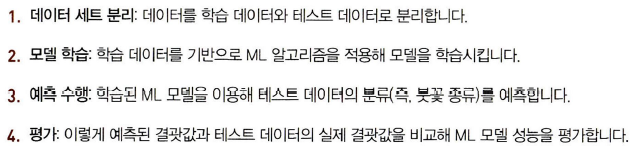

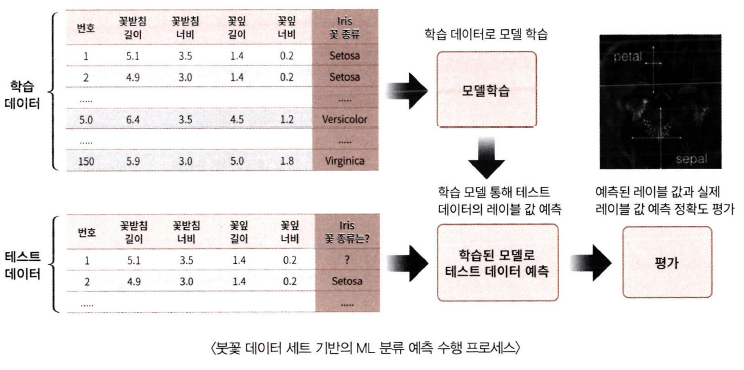

## **03 사이킷런의 기반 프레임워크 익히기**

---

## ■ Estimator 이해 및 fit(), predict() 메서드

---

ML 모델 학습을 위해서 fit()을, 학습된 모델의 예측을 위해 predict() 메서드 제공

지도학습의 주요 두 축인 분류(Classification)과 회귀(Regression)의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과 반환

Classifier: 분류 알고리즘을 구현한 클래스

Regressor: 회귀 알고리즘을 구현한 클래스

Classifier + Regressor = Estimator 클래스(지도학습의 모든 알고지름을 구현한 클래스)

cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받음

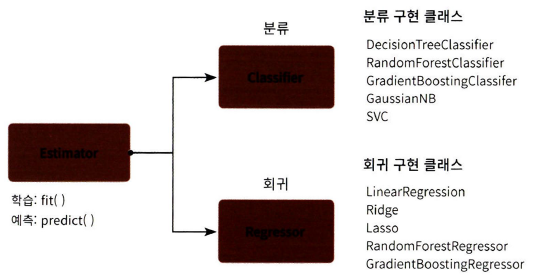

사이킷런에서 비지도학습인 차원 축소, 클러스터링, 피처 추출(feature Extraction) 등을 구현한 클래스 역시 대부분 fit()과 transform()을 적용

비지도학습과 피처 추출에서 fit()은 지도학습의 fit()과 같이 학습을 의미하지 않음

->입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전 구조를 맞추는 작업

fit()으로 변환을 위한 사전 구조를 맞추고 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행

fit()과 transform()을 하나로 결합한 fit_transform()도 제공됨

## ■ 사이킷런의 주요 모듈

---

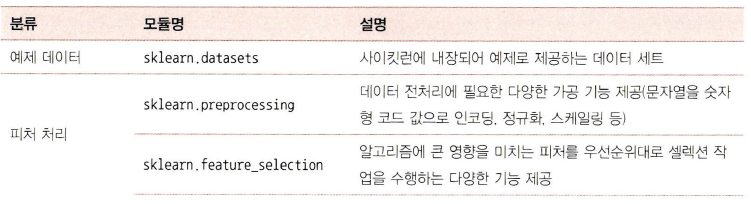

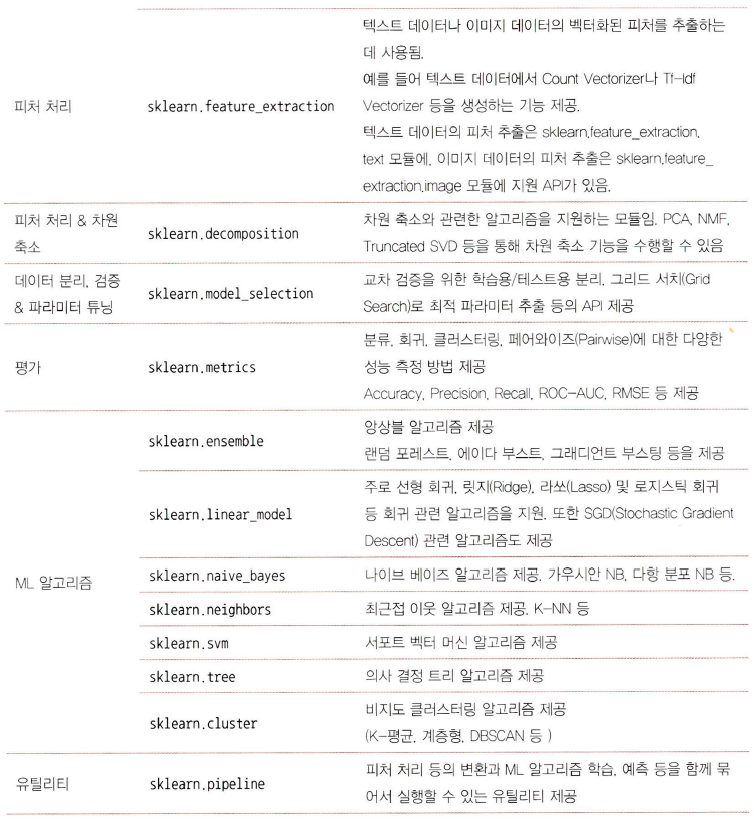

## ■ 내장된 예제 데이터 세트

---

사이킷런에 내장되어 있는 데이터 세트는 분류나 회귀를 연습하기 위한 예제용도의 데이터 세트 & 분류나 클러스터링을 위해 표본 데이터로 생성될 수 있는 데이터 세트로 나뉘어짐

**분류나 회귀 연습용 예제 데이터**

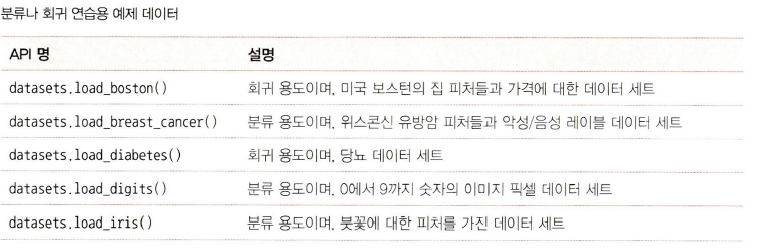

일반적으로 딕셔너리 형태로 되어있음

key는 보통 data, target, target_name, feature_names, DESCR로 구성되어있음

<u>개별 키가 가르키는 데이터 세트의 의미</u>

data는 피처의 데이터 세트를 가르킴

target은 분류 시 레이블 값, 회귀일 때는 숫자 결괏값 데이터 세트

target_names는 개별 레이블의 이름을 나타냄

feature_names는 피처의 이름을 나타냄

DESCR은 데이터 세트에 대한 설명과 각 피처의 설명을 나타냄

data, target은 넘파이 배열(ndarray) 타입

target_names, feature_names는 넘파이 배열 또는 파이썬 리스트(list) 타입

DESCR은 스트링 타입

In [15]:
#붓꽃 데이터 세트 생성

from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

In [16]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:',keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


데이터 키는 피처들의 데이터 값을 가리킴

->피처 데이터 값을 추출하기 위해선 데이터 세트.data 혹은 데이터세트['data'] 이용

load_iris()가 반환하는 붓꽃 데이터 세트의 각 키가 의미하는 값:

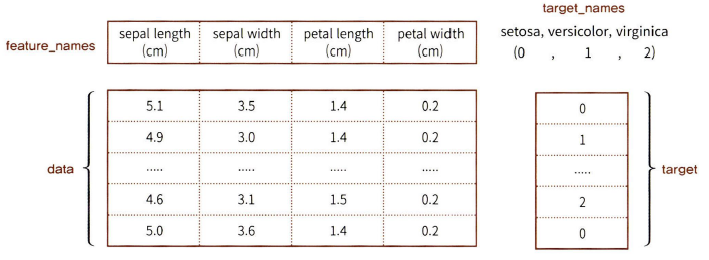

**fetch 계열 명령**

fetch 계열의 명령은 데이터의 크기가 커서 패키지에 처음부터 저장되어 있지 않고 인터넷에서 내려받아 추후 불러들이는 데이터(최초 사용 시에 인터넷에 연결돼있지 않으면 사용 불가)

fetch_covtype(): 회귀 분석용 토지 조사 자료

fetch_20newgroups(): 뉴스 그룹 텍스트 자료

fetch_olivetti_faces(): 얼굴 이미지 자료

fetch_lfw_people(): 얼굴 이미지 자료

fetch_lfw_pairs(): 얼굴 이미지 자료

fetch_rcv1(): 로이터 뉴스 말뭉치

fetch_mldata(): ML 웹사이트에서 다운로드

**분류와 클러스터링을 위한 표본 데이터 생성기**

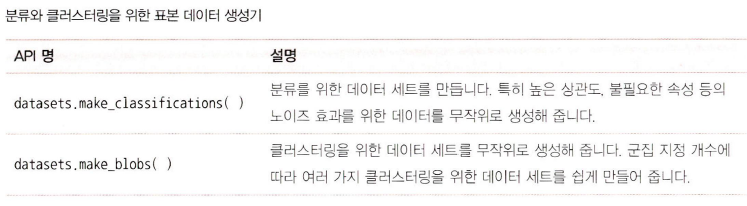

## **04 Model Selection 모듈 소개**

---

model_selection 모듈: 학습 데이터와 테스트 데이터 세트를 분리하거나 교차 검증 분할 및 평가, Estimator의 하이퍼 파라미터를 튜닝하기 위한 다양한 함수와 클래스 제공

## ■ 학습/테스트 데이터 세트 분리 -train_test_split()

---

테스트 데이터 세트를 이용하지 않고 학습 데이터 세트로만 학습하고 예측할 시의 문제점:

In [17]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data,train_label)

#학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label,pred))

예측 정확도: 1.0


정확도가 100%

=이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문

->테스트 전용 테스트 데이터 세트로 예측해야함

->train_test_split()으로 원본 데이터 세트에서 학습 및 테스트 데이터 세트 분리

sklearn.model_selection 모듈에서 train_test_split 로드

첫번째 파라미터: 피처 데이터 세트

두번째 파라미터: 레이블 데이터 세트

다음 파라미터들은 선택적으로 입력받음

test_size: 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링할 것인가를 결정. default:0.25(25%)

shuffle: 데이터를 분리하기 전에 데이터를 미리 섞을지 결정. default=True(효율적인 학습 및 테스트 데이터 세트 만드는 데 사용)

random_state: random_state은 호출할 때마다 동일한 학습/테스트용 데이터 세트를 생성하기 위해 주어지는 난수 값. 일정한 숫자값으로 부여

train_test_split()의 반환값은 튜플 형태.

순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피치 데이터 세트, 학습용 데이터의 레이블 데이터 세트, 테스트용 데이터의 레이블 데이터 세트 반환됨